In [1]:
import sys
import time
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import h5py
import xarray
import xrft

In [4]:
f = h5py.File('small_QL_g_s1_p0.h5', 'r')

r = f['scales']['r']['1.0']
z = f['scales']['z']['1.0']
th = f['scales']['th']['1.0']
t = f['scales']['sim_time']

th = np.asarray(th)
z = np.asarray(z)
r = np.asarray(r)
t = np.asarray(t)

ul = f['tasks']['ul']
uh = f['tasks']['uh']
vl = f['tasks']['vl']
vh = f['tasks']['vh']
wl = f['tasks']['wl']
wh = f['tasks']['wh']

ul = np.asarray(ul)
uh = np.asarray(uh)
vl = np.asarray(vl)
vh = np.asarray(vh)
wl = np.asarray(wl)
wh = np.asarray(wh)

In [31]:
N_r = r.shape[0]
N_th = th.shape[0]
N_z = z.shape[0]
N_t = t.shape[0]

v_r = ul + uh
v_theta = vl + vh
v_z = wl + wh


## The dimensions correspond to a is t, r, theta, z ##

"""
time_stamp = 0;
v_r_f = np.fft.fft(v_r[time_stamp],axis=1)
v_theta_f = np.fft.fft(v_theta[time_stamp],axis=1)
v_z_f = np.fft.fft(v_z[time_stamp],axis=1)

"""


## This 2-Dimensional array stores the eigenvalues for each corresponding wavenumber m and time t  pair ##
Q = np.zeros((N_th, N_t))

# print(Q.shape)
# print(Q)

for time_stamp in range(N_t):
    v_r_f = np.fft.fft(v_r[time_stamp],axis=1)
    v_theta_f = np.fft.fft(v_theta[time_stamp],axis=1)
    v_z_f = np.fft.fft(v_z[time_stamp],axis=1)
    for m in range(N_th):
        eigen_val = 0
        for R in range(1,N_r):
            for Z in range(1,N_z):
                Q_v_r = v_r_f[R][m][Z]
                Q_v_theta = v_theta_f[R][m][Z]
                Q_v_z = v_z_f[R][m][Z]
                power_amplitude = (Q_v_r)*np.conj(Q_v_r) + (Q_v_theta)*np.conj(Q_v_theta) + (Q_v_z)*np.conj(Q_v_z)
                ## print(power_amplitude)   just a check to see that all these values are real ##
                eigen_val += r[R]*(r[R]-r[R-1])*(z[Z]-z[Z-1])*(power_amplitude)
        Q[m][time_stamp] = 2*(np.pi)*eigen_val 

<ipython-input-31-fb9ab044c10f>:40: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[m][time_stamp] = 2*(np.pi)*eigen_val


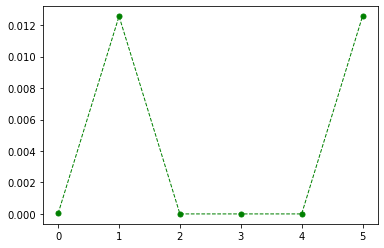

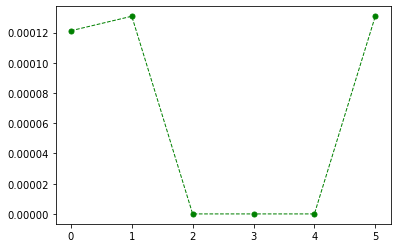

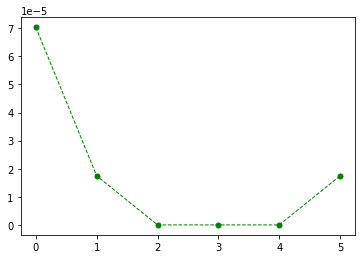

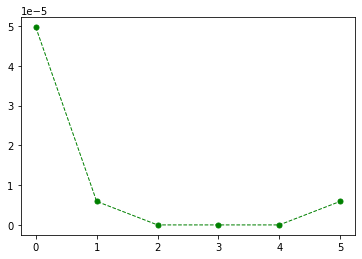

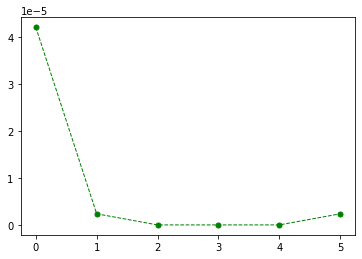

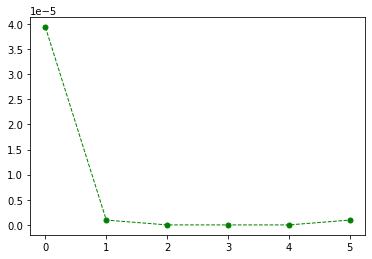

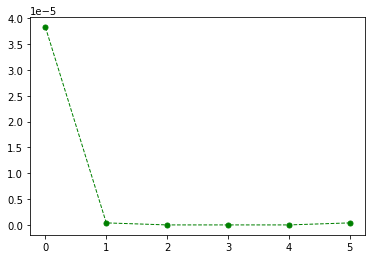

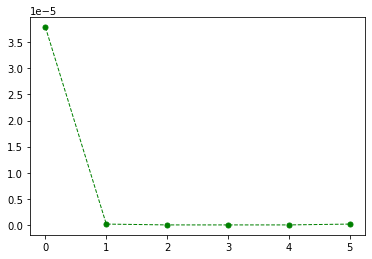

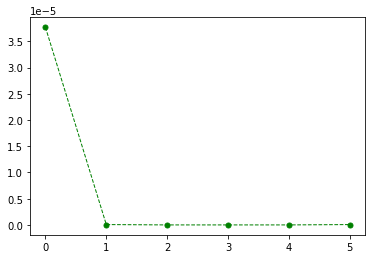

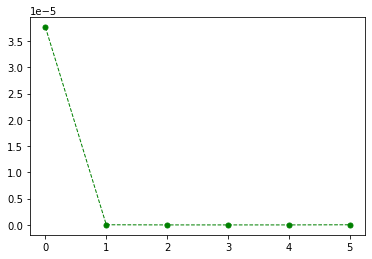

In [33]:
for time_slice in range(N_t):
    Q_t = np.asarray(Q[:, time_slice])
    # print(Q_t.shape)
    # print(Q_t)
    plt.plot(Q_t,color='green', marker='o', linestyle='dashed',linewidth=1, markersize=5)
    plt.xlabel('Wavenumebr m at {}'.)
    plt.ylabel('Eigenvalue')
    plt.show()